In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the required libraries
import h5py
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

Using TensorFlow backend.


In [3]:
# open the file

h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5','r')

In [4]:
list(h5f.keys()) # check the columns in the file

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [5]:
# Loading the training, testing and validation datas
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

h5f.close()

In [6]:
X_train.shape #checking the numbers of images in training set and its dimensions

(42000, 32, 32)

There are 42000 images in training data of dimension 32X32

In [7]:
y_train.shape

(42000,)

In [8]:
X_val.shape #checking the numbers of images in validation set and its dimensions

(60000, 32, 32)

There are 60000 images in validation data of dimension 32X32

In [9]:
y_val.shape

(60000,)

In [10]:
X_test.shape #checking the numbers of images in test set and its dimensions

(18000, 32, 32)

There are 18000 images in testing data of dimension 32X32

In [11]:
y_test.shape

(18000,)

In [12]:
y_test.view() #viewing the contents of y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

In [13]:
np.array(np.unique(y_train, return_counts=True)).T

array([[   0, 4186],
       [   1, 4172],
       [   2, 4197],
       [   3, 4281],
       [   4, 4188],
       [   5, 4232],
       [   6, 4168],
       [   7, 4192],
       [   8, 4188],
       [   9, 4196]], dtype=int64)

The data in the y_train are classified under 10 labels 0 to 9.

In [14]:
np.array(np.unique(y_val, return_counts=True)).T

array([[   0, 6000],
       [   1, 6000],
       [   2, 6000],
       [   3, 6000],
       [   4, 6000],
       [   5, 6000],
       [   6, 6000],
       [   7, 6000],
       [   8, 6000],
       [   9, 6000]], dtype=int64)

There are equal number of data in all the 10 labels from 0 to 9 in validation data

In [15]:
np.array(np.unique(y_test, return_counts=True)).T

array([[   0, 1814],
       [   1, 1828],
       [   2, 1803],
       [   3, 1719],
       [   4, 1812],
       [   5, 1768],
       [   6, 1832],
       [   7, 1808],
       [   8, 1812],
       [   9, 1804]], dtype=int64)

# Convert training, validation and testing labels into one-hot vectors.

In [16]:
trainY = tf.keras.utils.to_categorical(y_train,num_classes=10)
valY = tf.keras.utils.to_categorical(y_val,num_classes=10)
testY = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [17]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(42000, 10)
First 5 examples now are:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# visualize the first 10 training images

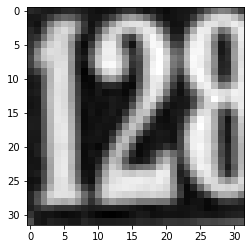

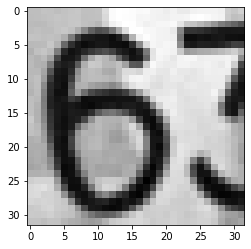

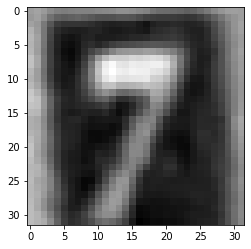

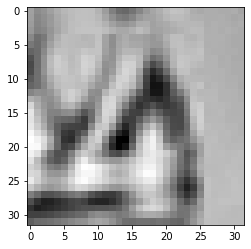

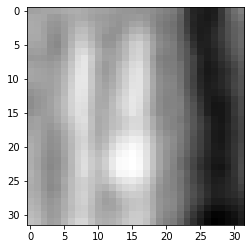

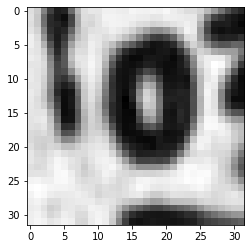

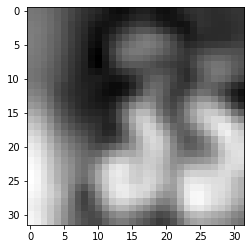

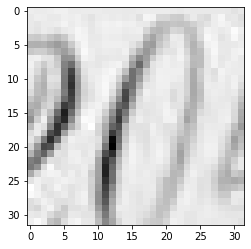

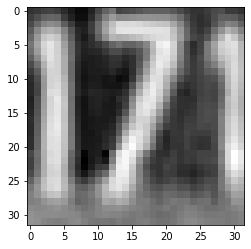

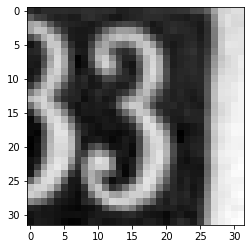

In [18]:
for i in range(10):
    image = X_train[i]
    plt.figure(i)
    plt.imshow(image, cmap= 'gray')

# Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [19]:
model = tf.keras.models.Sequential()

In [20]:
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [21]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [22]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(X_train,trainY,epochs=10,validation_data=(X_val,valY),batch_size=2000)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 62us/sample - loss: 5233.7254 - accuracy: 0.0975 - val_loss: 3900.8698 - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 0s 11us/sample - loss: 5522.4845 - accuracy: 0.0987 - val_loss: 4015.3724 - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 0s 11us/sample - loss: 5610.7856 - accuracy: 0.1053 - val_loss: 5694.5255 - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 0s 11us/sample - loss: 5565.1346 - accuracy: 0.1027 - val_loss: 6678.7722 - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 0s 11us/sample - loss: 5674.0270 - accuracy: 0.1017 - val_loss: 5610.7596 - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 0s 11us/sample - loss: 5612.3382 - accuracy: 0.1021 - val_loss: 5295.1675 - val_accuracy: 0.1000
Epoch 7/10
42000/420

The accuracy obtained is very less, so lets try by adding activation functions

# Adding activation functions such as reLU to the network

In [24]:
model = tf.keras.models.Sequential()

In [25]:
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [26]:
model.add(tf.keras.layers.Dense(100,activation='relu'))

In [27]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [28]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(X_train,trainY,epochs=10,validation_data=(X_val,valY),batch_size=2000)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 16us/sample - loss: 286.3439 - accuracy: 0.0995 - val_loss: 2.3679 - val_accuracy: 0.1003
Epoch 2/10
42000/42000 [==============================] - 0s 11us/sample - loss: 2.3514 - accuracy: 0.0987 - val_loss: 2.3371 - val_accuracy: 0.1004
Epoch 3/10
42000/42000 [==============================] - 0s 11us/sample - loss: 2.3325 - accuracy: 0.0975 - val_loss: 2.3273 - val_accuracy: 0.1005
Epoch 4/10
42000/42000 [==============================] - 0s 11us/sample - loss: 2.3250 - accuracy: 0.1000 - val_loss: 2.3221 - val_accuracy: 0.1003
Epoch 5/10
42000/42000 [==============================] - 0s 11us/sample - loss: 2.3205 - accuracy: 0.0996 - val_loss: 2.3185 - val_accuracy: 0.1003
Epoch 6/10
42000/42000 [==============================] - 0s 11us/sample - loss: 2.3172 - accuracy: 0.1000 - val_loss: 2.3158 - val_accuracy: 0.1003
Epoch 7/10
42000/42000 [==============================

Still the accuracy is less and loss is more, lets try to add batch normalization

# Adding Batch Normalization

In [30]:
model = tf.keras.models.Sequential()

In [31]:
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [32]:
model.add(tf.keras.layers.BatchNormalization())

In [33]:
model.add(tf.keras.layers.Dense(100,activation='relu'))

In [34]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [35]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(X_train,trainY,epochs=10,validation_data=(X_val,valY),batch_size=2000)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 50us/sample - loss: 2.9202 - accuracy: 0.1000 - val_loss: 5.8270 - val_accuracy: 0.1041
Epoch 2/10
42000/42000 [==============================] - 2s 40us/sample - loss: 2.7716 - accuracy: 0.0987 - val_loss: 3.7140 - val_accuracy: 0.1007
Epoch 3/10
42000/42000 [==============================] - 2s 43us/sample - loss: 2.6902 - accuracy: 0.0995 - val_loss: 3.0794 - val_accuracy: 0.0982
Epoch 4/10
42000/42000 [==============================] - 2s 40us/sample - loss: 2.6359 - accuracy: 0.0997 - val_loss: 2.8217 - val_accuracy: 0.0993
Epoch 5/10
42000/42000 [==============================] - 2s 40us/sample - loss: 2.5960 - accuracy: 0.1020 - val_loss: 2.6965 - val_accuracy: 0.1023
Epoch 6/10
42000/42000 [==============================] - 2s 42us/sample - loss: 2.5650 - accuracy: 0.1053 - val_loss: 2.6261 - val_accuracy: 0.1061
Epoch 7/10
42000/42000 [==============================] 

# Adding more layers and changing learning rate

In [37]:
model = tf.keras.models.Sequential()

In [38]:
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [39]:
model.add(tf.keras.layers.BatchNormalization())

In [40]:
model.add(tf.keras.layers.Dense(200,activation='relu'))

In [41]:
model.add(tf.keras.layers.Dense(100,activation='relu'))

In [42]:
model.add(tf.keras.layers.Dense(50,activation='relu'))

In [43]:
model.add(tf.keras.layers.Dense(20,activation='relu'))

In [44]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [45]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(X_train,trainY,epochs=100,validation_data=(X_val,valY),batch_size=2000)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 53us/sample - loss: 2.3502 - accuracy: 0.1138 - val_loss: 2.4181 - val_accuracy: 0.1143
Epoch 2/100
42000/42000 [==============================] - 2s 44us/sample - loss: 2.2752 - accuracy: 0.1467 - val_loss: 2.2954 - val_accuracy: 0.1387
Epoch 3/100
42000/42000 [==============================] - 2s 44us/sample - loss: 2.2409 - accuracy: 0.1814 - val_loss: 2.2457 - val_accuracy: 0.1780
Epoch 4/100
42000/42000 [==============================] - 2s 45us/sample - loss: 2.2048 - accuracy: 0.2111 - val_loss: 2.1907 - val_accuracy: 0.2237
Epoch 5/100
42000/42000 [==============================] - 2s 45us/sample - loss: 2.1617 - accuracy: 0.2426 - val_loss: 2.1349 - val_accuracy: 0.2637
Epoch 6/100
42000/42000 [==============================] - 2s 44us/sample - loss: 2.1106 - accuracy: 0.2759 - val_loss: 2.0722 - val_accuracy: 0.3007
Epoch 7/100
42000/42000 [=========================

In [47]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01) # reducing the learning rate thereby reducing the step size
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
model.fit(X_train,trainY,epochs=100,validation_data=(X_val,valY),batch_size=2000)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 57us/sample - loss: 0.4584 - accuracy: 0.8663 - val_loss: 0.5103 - val_accuracy: 0.8537
Epoch 2/100
42000/42000 [==============================] - 2s 46us/sample - loss: 0.4528 - accuracy: 0.8694 - val_loss: 0.5084 - val_accuracy: 0.8546
Epoch 3/100
42000/42000 [==============================] - 2s 46us/sample - loss: 0.4509 - accuracy: 0.8687 - val_loss: 0.5074 - val_accuracy: 0.8553
Epoch 4/100
42000/42000 [==============================] - 2s 47us/sample - loss: 0.4496 - accuracy: 0.8692 - val_loss: 0.5069 - val_accuracy: 0.8553
Epoch 5/100
42000/42000 [==============================] - 2s 49us/sample - loss: 0.4486 - accuracy: 0.8689 - val_loss: 0.5054 - val_accuracy: 0.8557
Epoch 6/100
42000/42000 [==============================] - 2s 49us/sample - loss: 0.4462 - accuracy: 0.8707 - val_loss: 0.5053 - val_accuracy: 0.8562
Epoch 7/100
42000/42000 [=========================

In [49]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001) # reducing the learning rate further
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(X_train,trainY,epochs=50,validation_data=(X_val,valY),batch_size=2000)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 2s 50us/sample - loss: 0.3453 - accuracy: 0.9016 - val_loss: 0.4320 - val_accuracy: 0.8808
Epoch 2/50
42000/42000 [==============================] - 2s 44us/sample - loss: 0.3453 - accuracy: 0.9013 - val_loss: 0.4318 - val_accuracy: 0.8808
Epoch 3/50
42000/42000 [==============================] - 2s 45us/sample - loss: 0.3445 - accuracy: 0.9018 - val_loss: 0.4317 - val_accuracy: 0.8809
Epoch 4/50
42000/42000 [==============================] - 2s 45us/sample - loss: 0.3448 - accuracy: 0.9013 - val_loss: 0.4316 - val_accuracy: 0.8810
Epoch 5/50
42000/42000 [==============================] - 2s 44us/sample - loss: 0.3446 - accuracy: 0.9020 - val_loss: 0.4316 - val_accuracy: 0.8810
Epoch 6/50
42000/42000 [==============================] - 2s 44us/sample - loss: 0.3448 - accuracy: 0.9014 - val_loss: 0.4315 - val_accuracy: 0.8809
Epoch 7/50
42000/42000 [==============================] 

The model is giving accuracy of 88% on validation data. Lets check on the test data

In [51]:
prediction = model.predict(X_test)

In [52]:
model.evaluate(X_test,testY)

18000/18000 [==============================] - 0s 20us/sample - loss: 0.6437 - accuracy: 0.8291


[0.6436500735282898, 0.8291111]

The accuracy on test data is 82.9%

In [53]:
y_pred = np.argmax(prediction,axis=1)
labels = np.argmax(testY, axis=1)

## Classification report

In [54]:
print("Classification Report")
print(metrics.classification_report(labels, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1814
           1       0.85      0.85      0.85      1828
           2       0.86      0.85      0.85      1803
           3       0.77      0.79      0.78      1719
           4       0.86      0.86      0.86      1812
           5       0.80      0.81      0.81      1768
           6       0.82      0.81      0.81      1832
           7       0.87      0.87      0.87      1808
           8       0.80      0.78      0.79      1812
           9       0.81      0.81      0.81      1804

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



# Lets check the prediction for some random samples

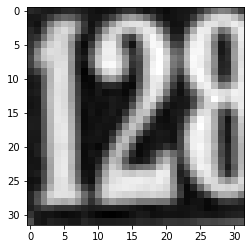

In [55]:
plt.imshow(X_train[0].reshape(32,32), cmap='gray')

In [56]:
# Predict Scores for each class
predict = model.predict(X_train)

In [57]:
predict[0]

array([1.2702447e-10, 5.0740107e-10, 9.9998927e-01, 7.7194909e-06,
       5.3613750e-12, 4.5004195e-14, 7.3270930e-13, 2.4986487e-06,
       4.6235959e-07, 9.3425927e-11], dtype=float32)

In [58]:
np.argmax(predict[0])

2

In [59]:
y_train[0]

2

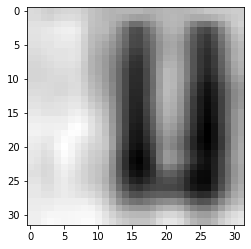

In [60]:
plt.imshow(X_train[24].reshape(32,32), cmap='gray')

In [61]:
np.argmax(predict[24])

1

In [62]:
y_train[24]

1

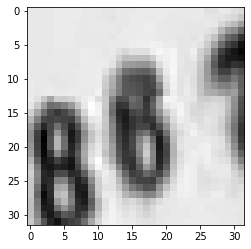

In [63]:
plt.imshow(X_train[500].reshape(32,32), cmap='gray')

In [64]:
y_train[500]

6

In [65]:
np.argmax(predict[500])

8

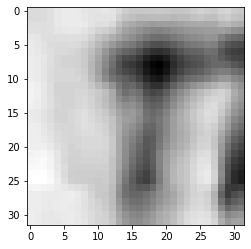

In [66]:
plt.imshow(X_train[3000].reshape(32,32), cmap='gray')

In [67]:
np.argmax(predict[3000])

7

In [68]:
y_train[3000]

7

### The neural network built with 4 hidden layers with relu activation function, output layer with softmax activation using batch normalization and varying learning rates is giving an accuracy of 82.9% on test data. The prediction done by model on some of the images is also given for four of the test images.